In [2]:
! ls drive/MyDrive

 acc-valacc-DenseNet121.png   evaluation.py
'Colab Notebooks'	      __init__.py
 DenseNet121.h5		      loss_valloss-DenseNet121.png
 DenseNet121-stats.csv	      plant-data
 DenseNet121-summary.txt      __pycache__
 DenseNet121.zip	      yield_gen.py


In [3]:
from drive.MyDrive.yield_gen import * 
from drive.MyDrive.evaluation import * 

In [5]:
docs()



    * functions
        - generator() : arguments gen_type = ( with-aug | with-augmentation ) & host = ( local | colab )

    * usage 
    
        from yield_gen import * 
        train, valid, test = generator(gen_type="with-aug", host="colab") # returns a tf.generator object with data

    * requirements
    
        - local data directory structure
            ./plant-data
                /Train
                    /Train
                        ..samples
                /Test
                    /Test
                        ..samples 
                /Validation
                    /Validation
                        ..samples
        
        - Colab data directory structure 
            ./drive
                ./MyDrive
                    /plant-data
                        /Train
                            /Train
                                ..samples
                        /Test
                            /Test
                                ..samples 
             

In [6]:
train, valid, test = generator(gen_type="with-aug", host="colab")

Colab Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Add, Dense,Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
# Custom ConvNet

In [18]:
train.image_shape[:2]

(256, 256)

In [24]:
# Network Architecture
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same',input_shape=train.image_shape, activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [25]:
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 127, 127, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)       

In [27]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience=3)

In [28]:
train

In [29]:
import time

start = time.perf_counter()

perf = model.fit(train, epochs=30, callbacks=[early_stop],validation_data=valid)

elapsed = time.perf_counter()- start 

print('Elapsed {}'.format(elapsed/60))

Epoch 1/30
42/42 [==============================] - 762s 18s/step - loss: 1.4667 - accuracy: 0.3419 - val_loss: 1.0793 - val_accuracy: 0.4095
Epoch 2/30
42/42 [==============================] - 195s 5s/step - loss: 0.8690 - accuracy: 0.5598 - val_loss: 0.8468 - val_accuracy: 0.5619
Epoch 3/30
42/42 [==============================] - 195s 5s/step - loss: 0.7133 - accuracy: 0.6853 - val_loss: 0.8890 - val_accuracy: 0.5524
Epoch 4/30
42/42 [==============================] - 194s 5s/step - loss: 0.6520 - accuracy: 0.7224 - val_loss: 0.7551 - val_accuracy: 0.5905
Epoch 5/30
42/42 [==============================] - 194s 5s/step - loss: 0.6164 - accuracy: 0.7300 - val_loss: 1.0356 - val_accuracy: 0.5143
Epoch 6/30
42/42 [==============================] - 193s 5s/step - loss: 0.5913 - accuracy: 0.7390 - val_loss: 0.6925 - val_accuracy: 0.6476
Epoch 7/30
42/42 [==============================] - 194s 5s/step - loss: 0.5507 - accuracy: 0.7685 - val_loss: 0.4627 - val_accuracy: 0.8095
Epoch 8/30
4

In [33]:
import pandas as pd 
history = pd.DataFrame(perf.history)

In [36]:
history

,loss,accuracy,val_loss,val_accuracy
0,1.466709,0.341906,1.079309,0.409524
1,0.868959,0.559758,0.846813,0.561905
2,0.713301,0.685325,0.888958,0.552381
3,0.652018,0.722390,0.755073,0.590476
4,0.616354,0.729955,1.035600,0.514286
5,0.591334,0.739032,0.692468,0.647619
6,0.550750,0.768533,0.462658,0.809524
7,0.728728,0.762481,0.827691,0.628571
8,0.620606,0.726929,0.765461,0.590476
9,0.625167,0.724660,0.678853,0.704762


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation Accuracy - 67.62%
validation loss - 0.67
Test Accuracy - 76.19%
Test loss - 0.55
preserving records
ConvNet Records Created


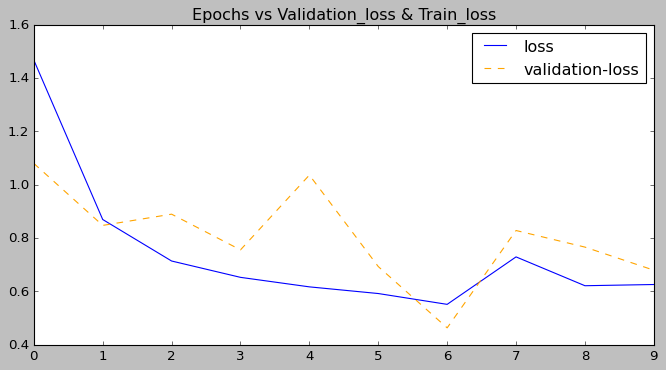

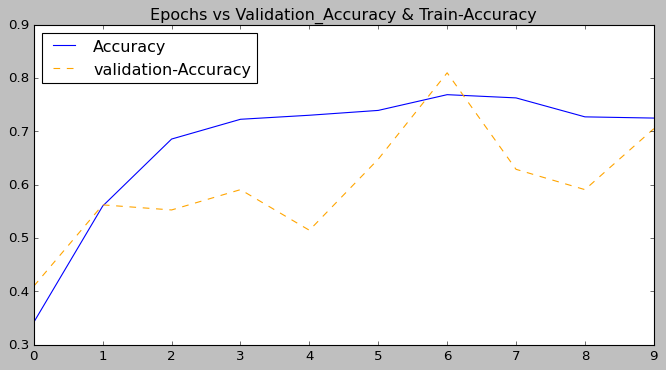

In [37]:
evaluate_model("ConvNet",model, valid, test,history, elapsed)

In [43]:
from google.colab import files
files.download('drive/MyDrive/ConvNet.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
_, t_valid, t_test = generator(gen_type="without-aug", host="colab") 

Colab Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
def merge_gendata(generator=valid):
  
    
    validx = valid[0][0]
    validy = valid[0][1]
    for idx in range(1,4):
        validx = np.concatenate((validx,valid[idx][0]), axis=0)
        validy = np.concatenate((validy,valid[idx][1]), axis=0)
    return validx, validy

In [49]:
testx, testy = merge_gendata(generator=t_test)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support as score

In [74]:

def confmatrix(model, testx, testy,modelname='ConvNet'):
    

    #     print(model.summary())
        dpreds = model.predict(testx)

        dpredcls = []
        for l in range(0,len(dpreds)):
            dpredcls.append(dpreds[l].argmax())
        clsmax = []
        for l in range(0, len(testy)):
            clsmax.append(testy[l].argmax())

        count = 0
        for pred, true in zip(dpredcls, clsmax):
            if pred == true:
                count+=1

        print(f"{count}/105 are correctly classified")

        confmat = pd.DataFrame(confusion_matrix(dpredcls, clsmax), columns=list(valid.class_indices.keys()))
        confmat.index = list(valid.class_indices.keys())
#         print(confmat)

        plt.figure(figsize=(8,6))
        plt.title('confusion matrix - {}'.format(modelname),size=15)
        plt.style.use('seaborn-darkgrid')
        sns.heatmap(confmat,cmap='GnBu',annot=True,fmt='d',cbar=False)



        return dpredcls, clsmax, count
        

69/105 are correctly classified


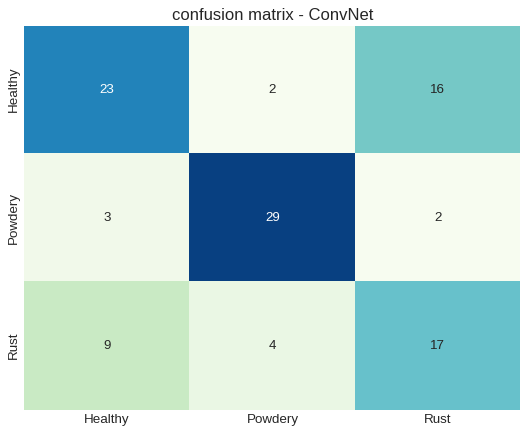

In [75]:
preds, true, count = confmatrix(model, testx, testy)

In [69]:
precision,recall,fscore,support=score(preds,true,average='macro')

In [70]:
precision

0.6571428571428571

In [71]:
recall

0.6601944842977842

In [72]:
fscore

0.6563065970388625

In [76]:
count

69